<a href="https://colab.research.google.com/github/AmakaDBI/ML_Projects/blob/master/MostRecent_ChamberSensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Analysing the measurement accuracy of low cost sensors for CO2 quantification in marginal ecotopes on the Irish 
#peatland site

#Import the neccessary libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Load the dataset
data=pd.read_csv('data/chambersSensors.csv', parse_dates=True, index_col='Date')
data.head(5)

,Central,Marginal,EC_1466,EC_1827,EC_1824,C_1825,C_1467,C_1828,AirTemperature
Date,,,,,,,,,
2019-10-24,416.56,417.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-11,423.74,422.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-28,452.79,438.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-12,420.95,420.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-16,426.08,424.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_names={'Central':'Chamber(Central)','EC_1466':'DL_1466','EC_1827':'DL_1827','EC_1824':'DL_1824'}
data=data.rename(columns=column_names)

In [ ]:
Central_1466_data=data[['Chamber(Central)','DL_1466','AirTemperature']]
Central_1466_data.dropna(axis=0, inplace=True)
Central_1466_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Chamber(Central),DL_1466,AirTemperature
Date,,,
2020-10-01,422.37,428.0,7.969
2020-01-21,427.94,422.0,8.190
2020-03-02,421.51,400.5,6.330
2020-04-03,424.24,397.5,11.591
2020-03-19,426.44,413.0,10.256


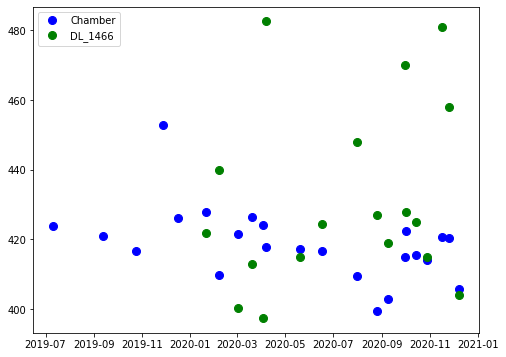

In [ ]:
fig =  plt.figure(figsize=(8,6))
plt.plot(data['Chamber(Central)'], 'bo', markersize=8, label='Chamber')
plt.plot(data['DL_1466'], 'go', ms=8, label='DL_1466')
plt.legend()




array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

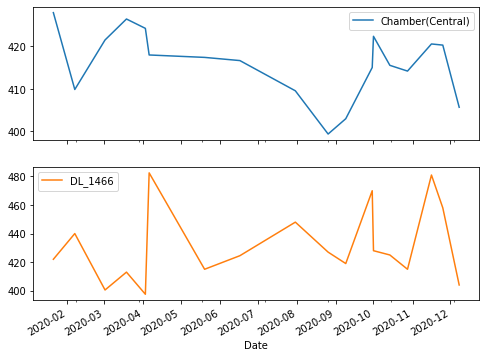

In [ ]:
fig1=Central_1466_data.drop(['AirTemperature'], axis=1)
fig1.plot(subplots=True,kind='line', figsize=(8,6))

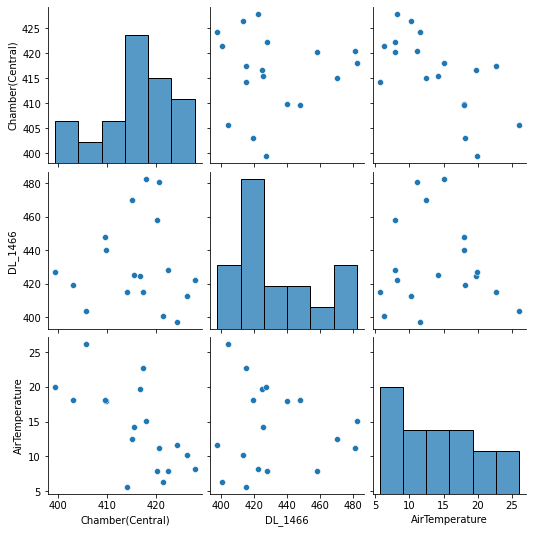

In [ ]:
sns.pairplot(Central_1466_data)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_1466=round(mean_absolute_error(Central_1466_data['Chamber(Central)'], Central_1466_data['DL_1466']),2)
rmse_1466=round(np.sqrt(mean_squared_error(Central_1466_data['Chamber(Central)'], Central_1466_data['DL_1466'])),2)
print('MAE_1466:', mae_1466)
print('RMSE_1466:', rmse_1466)

MAE_1466: 23.6
RMSE_1466: 30.94


In [ ]:
ec_sensors=data[['Chamber(Central)', 'DL_1466', 'DL_1827', 'DL_1824', 'AirTemperature']]
ec_sensors.dropna(axis=0, inplace=True)
ec_sensors

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Chamber(Central),DL_1466,DL_1827,DL_1824,AirTemperature
Date,,,,,
2020-07-31,409.55,448.0,419.0,408.0,18.044
2020-12-08,405.68,404.0,411.0,410.0,26.107
2020-08-26,399.38,427.0,404.0,399.0,19.972
2020-09-09,402.98,419.0,406.0,404.0,18.087
2020-09-30,415.03,470.0,390.0,414.0,12.481
2020-10-14,415.54,425.0,446.0,417.0,14.167
2020-10-28,414.19,415.0,413.0,400.0,5.643
2020-11-16,420.57,481.0,428.0,423.0,11.154
2020-11-25,420.30,458.0,425.0,407.0,7.864


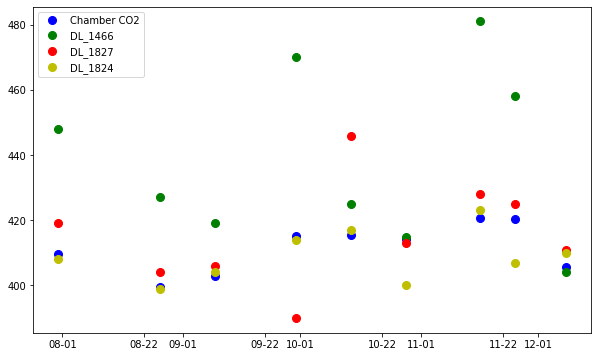

In [ ]:
from matplotlib.dates import DateFormatter
#fig =  plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(ec_sensors['Chamber(Central)'], 'bo', markersize=8, label='Chamber CO2')
plt.plot(ec_sensors['DL_1466'], 'go', ms=8, label='DL_1466')
plt.plot(ec_sensors['DL_1827'], 'ro', ms=8, label='DL_1827')
plt.plot(ec_sensors['DL_1824'], 'yo', ms=8, label='DL_1824')
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.legend()

C:\Users\aorae.DESKTOP-1B4QBTM\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



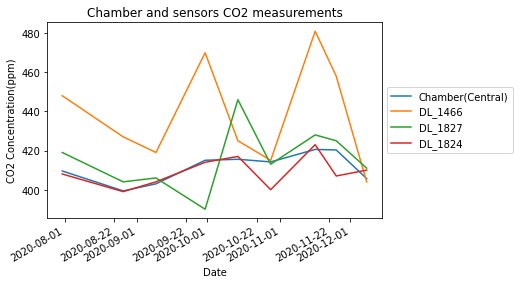

In [ ]:
ec_sensors.drop(['AirTemperature'], axis=1, inplace=True)
ec_sensors.plot(title='Chamber and sensors CO2 measurements')

plt.ylabel('CO2 Concentration(ppm)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

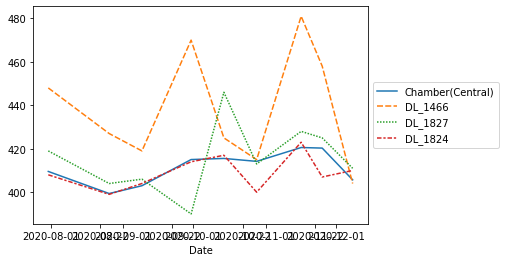

In [ ]:
sns.lineplot(data = ec_sensors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
print('MAE_1466:', mae_1466)
print('RMSE_1466:', rmse_1466)
print()

mae_1827=round(mean_absolute_error(ec_sensors['Chamber(Central)'], ec_sensors['DL_1827']),2)
rmse_1827=round(np.sqrt(mean_squared_error(ec_sensors['Chamber(Central)'], ec_sensors['DL_1827'])),2)
print('MAE_1827:', mae_1827)
print('RMSE_1827:', rmse_1827)
print()

mae_1824=round(mean_absolute_error(ec_sensors['Chamber(Central)'], ec_sensors['DL_1824']),2)
rmse_1824=round(np.sqrt(mean_squared_error(ec_sensors['Chamber(Central)'], ec_sensors['DL_1824'])),2)
print('MAE_1824:', mae_1824)
print('RMSE_1824:', rmse_1824)

MAE_1466: 23.6
RMSE_1466: 30.94

MAE_1827: 10.14
RMSE_1827: 14.07

MAE_1824: 4.41
RMSE_1824: 6.75


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X=ec_sensors.drop(['Chamber(Central)','DL_1466'], axis=1)
Y=ec_sensors['Chamber(Central)']
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.1)

In [ ]:
mlr=LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict=mlr.predict(X_train)

In [ ]:
mae_fusedsensors=mean_absolute_error(y_predict, y_train)
rmse_fusedsensors=np.sqrt(mean_squared_error(y_predict, y_train))
print('MAE of fused sensors:',mae_fusedsensors)
print('RMSE of fused sensors:',rmse_fusedsensors)

MAE of fused sensors: 4.5175502847874185
RMSE of fused sensors: 5.2169338922252875


In [ ]:
errors={'Sensors': ['DL_1466','DL_1827','DL_1824', 'Sensor_fusion'],
        'MAE': [23.6,10.14,4.41,3.01],
        'RMSE':[30.94, 14.07,6.75,3.45]
        }
error_df=pd.DataFrame(errors, columns=['Sensors','MAE', 'RMSE'])
error_df

,Sensors,MAE,RMSE
0,DL_1466,23.60,30.94
1,DL_1827,10.14,14.07
2,DL_1824,4.41,6.75
3,Sensor_fusion,3.01,3.45


Text(0, 0.5, 'MAE')

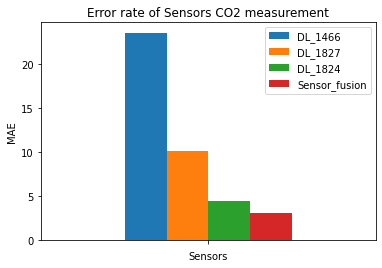

In [ ]:
#plotdata=pd.DataFrame(MAE={'DL_1466':'23.60','DL_1827':'10.14','DL_1824':'4.41', 'Sensor_fusion':'3.01'},
                     #RMSE={'DL_1466':'30.94','DL_1827':'14.07','DL_1824':'6.75', 'Sensor_fusion':'3.45'})

plotdata = pd.DataFrame({
   "DL_1466":[23.60 ],
    "DL_1827":[10.14],
    "DL_1824":[4.41],
    "Sensor_fusion":[3.01],
    
    }, 
   index=[""]
)
plotdata.plot(kind="bar")
plt.title("Error rate of Sensors CO2 measurement")
plt.xlabel("Sensors")
plt.ylabel('MAE')

In [ ]:
measurements={'Date':['2020-07-31','2020-08-26']}

In [ ]:
y_predict
y_predict=pd.DataFrame(y_predict)

In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
df.rename(columns={0:'Sensor fusion'})

,Sensor fusion
0,420.807739
1,411.648988
2,404.894881
3,415.373473
4,405.064135
5,412.340173
6,406.883511
7,405.907100


In [ ]:
y_train

,Central
Date,
2020-11-16,420.57
2020-07-31,409.55
2020-08-26,399.38
2020-10-14,415.54
2020-10-28,414.19
2020-09-30,415.03
2020-12-08,405.68
2020-09-09,402.98


In [ ]:
df1=pd.read_excel('data/chambers_sensors_CO2.xlsx', sheet_name='Sheet2', parse_dates=True, index_col='Date')

<AxesSubplot:xlabel='Date'>

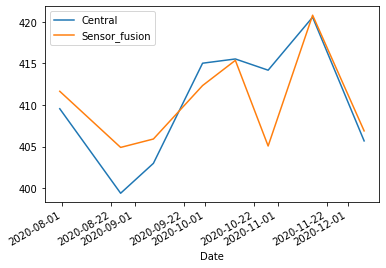

In [ ]:
df1.plot()